### Question 8 - Using the data from Question 5, write code the analyze the data and answer the following questions Note -
* 1. Draw plots to demonstrate the analysis for the following questions and better visualizations
* 2. Write code comments wherever required for code understanding
#### Insights to be drawn -
* Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
* Get all the episode names, whose average rating is more than 8 for every season
* Get all the episode names that aired before May 2019
* Get the episode name from each season with the highest and lowest rating
* Get the summary for the most popular ( ratings ) episode in every season

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('westworld.csv')
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,average_rating,medium_image,original_image,summary,self_links,show_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,02-10-2016,9:00 PM,03-10-2016 01:00,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,A woman named Dolores is a free spirit in the ...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,09-10-2016,9:00 PM,10-10-2016 01:00,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard suspects that someone is sabotaging th...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,16-10-2016,9:00 PM,17-10-2016 01:00,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Bernard continues to investigate Dolores' supp...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,23-10-2016,9:00 PM,24-10-2016 01:00,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,While Dolores joins William and Logan on their...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,30-10-2016,9:00 PM,31-10-2016 01:00,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,Dolores takes the first step on her path of di...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


### 1.Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

Text(0, 0.5, 'name')

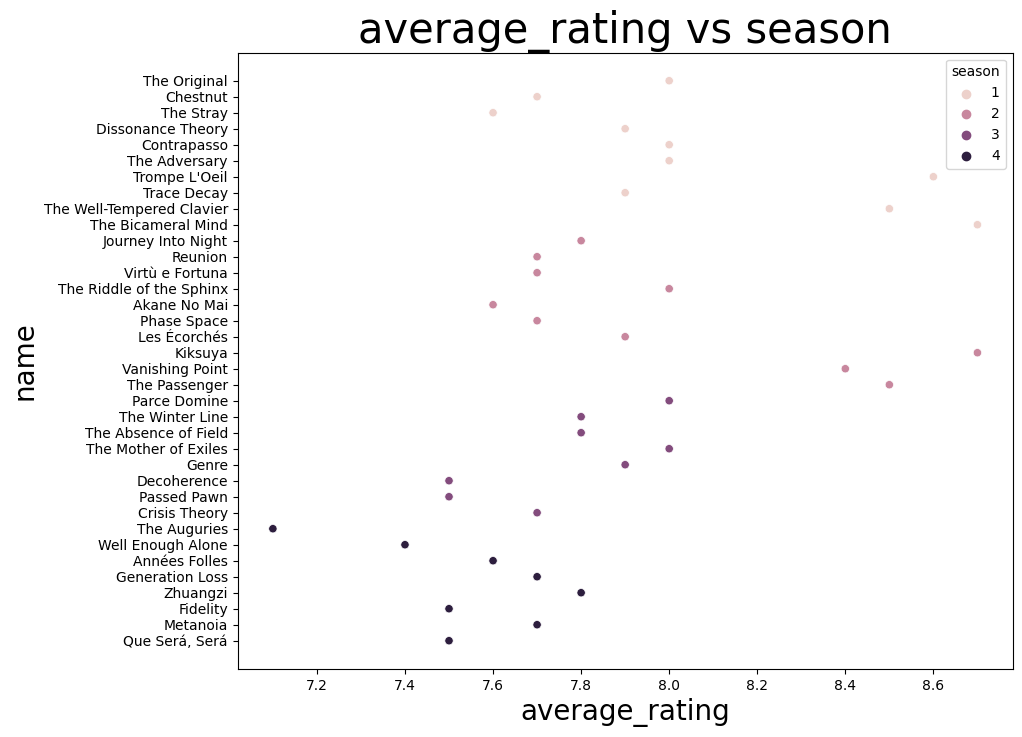

In [2]:
fig = plt.figure(figsize=(10,8))
plt.title('average_rating vs season',fontsize=30)
sns.scatterplot(y='name',x='average_rating',data=df,hue='season')
plt.xlabel("average_rating",fontsize=20,weight=20)
plt.ylabel("name",fontsize=20,weight=20)

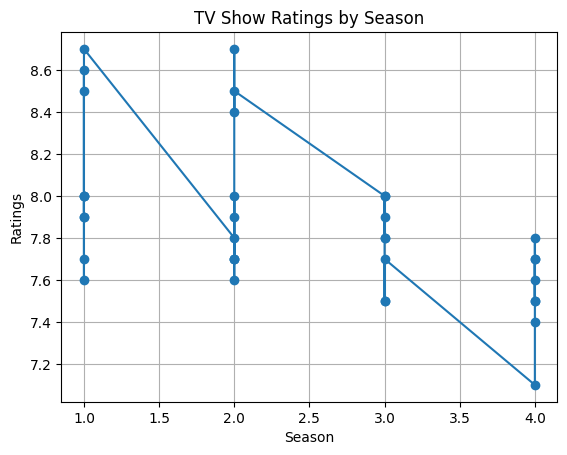

In [3]:
plt.plot(df['season'], df['average_rating'], marker='o')
plt.xlabel('Season')
plt.ylabel('Ratings')
plt.title('TV Show Ratings by Season')
plt.grid(True)
plt.show()

In [4]:
names = df.groupby(['average_rating','season','name']).size().reset_index().rename(columns={0:'Rating Count'})
names

,average_rating,season,name,Rating Count
0,7.1,4,The Auguries,1
1,7.4,4,Well Enough Alone,1
2,7.5,3,Decoherence,1
3,7.5,3,Passed Pawn,1
4,7.5,4,Fidelity,1
5,7.5,4,"Que Será, Será",1
6,7.6,1,The Stray,1
7,7.6,2,Akane No Mai,1
8,7.6,4,Années Folles,1
9,7.7,1,Chestnut,1


<AxesSubplot:xlabel='average_rating', ylabel='name'>

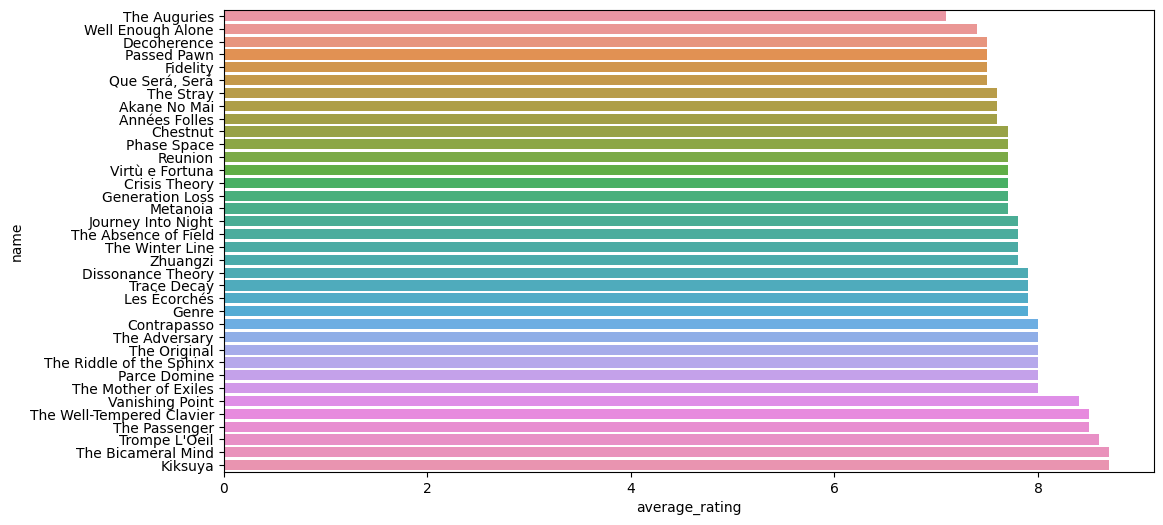

In [5]:
import matplotlib 
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='average_rating',y='name',data=names)

### 2.Get all the episode names, whose average rating is more than 8 for every season

In [6]:
df[df['average_rating']> 8]['name']

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

### 3.Get all the episode names that aired before May 2019

In [8]:
import datetime
df['airdate'] = pd.to_datetime(df['airdate'])
df['Year'] = df['airdate'].dt.year
df['Month'] = df['airdate'].dt.month

In [9]:
df[(df['Year'] < 2019) & (df['Month'] < 5)]['name'].unique()

array(['The Original', 'The Bicameral Mind', 'Journey Into Night',
       'Reunion', 'Les Écorchés'], dtype=object)

### 4.Get the episode name from each season with the highest and lowest rating

In [10]:
rating = df.groupby(['season','average_rating'])['name'].unique()
rating =rating.to_frame().sort_values('season',ascending=True)
rating

name
season average_rating                                            
1      7.6                                            [The Stray]
       7.7                                             [Chestnut]
       7.9                       [Dissonance Theory, Trace Decay]
       8.0             [The Original, Contrapasso, The Adversary]
       8.5                            [The Well-Tempered Clavier]
       8.6                                        [Trompe L'Oeil]
       8.7                                   [The Bicameral Mind]
2      8.7                                              [Kiksuya]
       8.5                                        [The Passenger]
       8.0                             [The Riddle of the Sphinx]
       8.4                                      [Vanishing Point]
       7.8                                   [Journey Into Night]
       7.7                [Reunion, Virtù e Fortuna, Phase Space]
       7.6                                         [Akane No Mai]
       7.9                                         [Les Écorchés]
3      7.5                             [Decoherence, Passed Pawn]
       7.7                                        [Crisis Theory]
       7.8                [The Winter Line, The Absence of Field]
       7.9                                                [Genre]
       8.0                   [Parce Domine, The Mother of Exiles]
4      7.7                            [Generation Loss, Metanoia]
       7.1                                         [The Auguries]
       7.4                                    [Well Enough Alone]
       7.5                             [Fidelity, Que Será, Será]
       7.6                                        [Années Folles]
       7.8                                             [Zhuangzi]

### 5.Get the summary for the most popular ( ratings ) episode in every season

In [11]:
df[df['average_rating'] == df['average_rating'].max()]['summary']

9     Delores finds out the truth about William's fa...
17    Another of Westworld's Host revolutionaries is...
Name: summary, dtype: object